In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [68]:
# 1. load the data 
#Food=pd.concat([pd.read_json('C:\\Users\\Valery\\Desktop\\whats-cooking\\train1.json'), pd.read_json('C:\\Users\\Valery\\Desktop\\whats-cooking\\test1.json')]).reset_index()
food=pd.read_json('C:\\Users\\Valery\\Desktop\\whats-cooking\\train1.json')
Food.head()

,index,cuisine,id,ingredients
0,0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


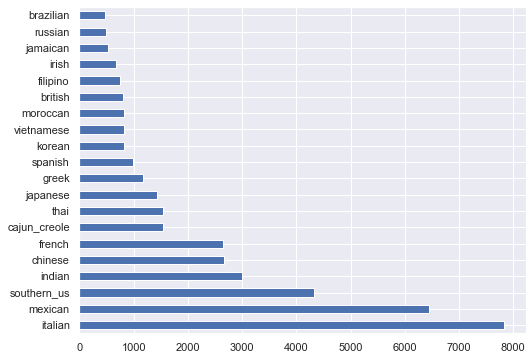

In [65]:
# to find how many cuisine within the train source 
Food['cuisine'].value_counts().plot(kind='barh',figsize=(8,6))

In [6]:
# what is the most common ingridents?  
from collections import Counter

In [7]:
counter={}
for cuisine in train['cuisine'].unique():
    counter[cuisine]=Counter()
    indices=(train['cuisine']==cuisine)
    for ingredients in train[indices]['ingredients']:
        counter[cuisine].update(ingredients)

In [67]:
# to find individual cuisine that have the most common 
counter['indian'].most_common(10) 

[('salt', 1934),
 ('onions', 1195),
 ('garam masala', 862),
 ('water', 820),
 ('ground turmeric', 728),
 ('garlic', 726),
 ('cumin seed', 697),
 ('ground cumin', 683),
 ('vegetable oil', 593),
 ('oil', 546)]

In [9]:
# i will be finding the top 10 ingridents within the different cuisine 
top10 = pd.DataFrame([[items[0] for items in counter[cuisine].most_common(10)] 
                      for cuisine in counter],
            index=[cuisine for cuisine in counter],
            columns=['top{}'.format(i) for i in range(1, 11)])
display(top10.head(20))

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


In [10]:
import re 
import base64 
import pdb 

In [11]:
train['all_ingredients']=train['ingredients'].map(','.join)
train.head()

,id,cuisine,ingredients,all_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce,black olives,grape tomatoes,ga..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour,ground pepper,salt,tomatoes,ground..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs,pepper,salt,mayonaise,cooking oil,green c..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","water,vegetable oil,wheat,salt"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","black pepper,shallots,cornflour,cayenne pepper..."


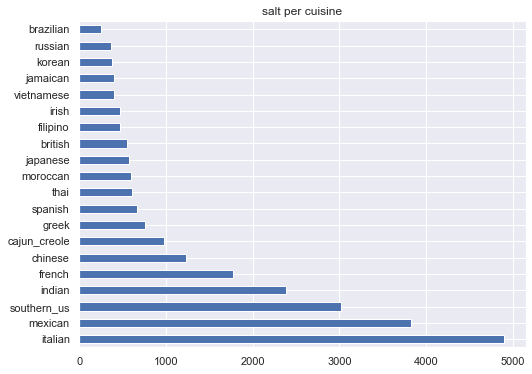

In [14]:
# check onions as differentiator 
indices = train['all_ingredients'].str.contains('salt')
train[indices]['cuisine'].value_counts().plot(kind='barh',title='salt per cuisine',figsize=(8,6));

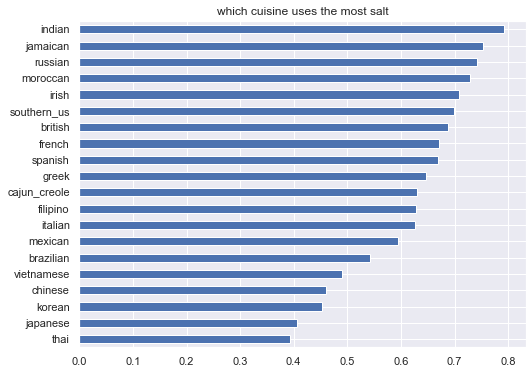

In [15]:
relative_freq = (train[indices]['cuisine'].value_counts() / train['cuisine'].value_counts())
relative_freq.sort_values(inplace=True)
relative_freq.plot(kind='barh',title='which cuisine uses the most salt',figsize=(8,6));

# indian cuisine use alot of salt, follow by jamacian and then russian. 

In [16]:
import numpy as np
unique = np.unique(top10.values.ravel())
unique

array(['all-purpose flour', 'avocado', 'baking powder', 'baking soda',
       'black pepper', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'chili powder',
       'coconut milk', 'corn starch', 'corn tortillas', 'cumin seed',
       'dried oregano', 'dried thyme', 'eggs', 'extra-virgin olive oil',
       'feta cheese crumbles', 'fish sauce', 'fresh lemon juice',
       'fresh lime juice', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green onions', 'ground allspice', 'ground black pepper',
       'ground cinnamon', 'ground cumin', 'ground ginger',
       'ground turmeric', 'jalapeno chilies', 'large eggs', 'lime',
       'milk', 'mirin', 'oil', 'olive oil', 'onions', 'paprika', 'pepper',
       'potatoes', 'red bell pepper', 'rice vinegar', 'sake', 'salt',
       'scallions', 'sesame oil', 'sesame seeds', 'shallots',
       'sour cream', 'soy sauce', 'sugar', 'tomatoes', 'un

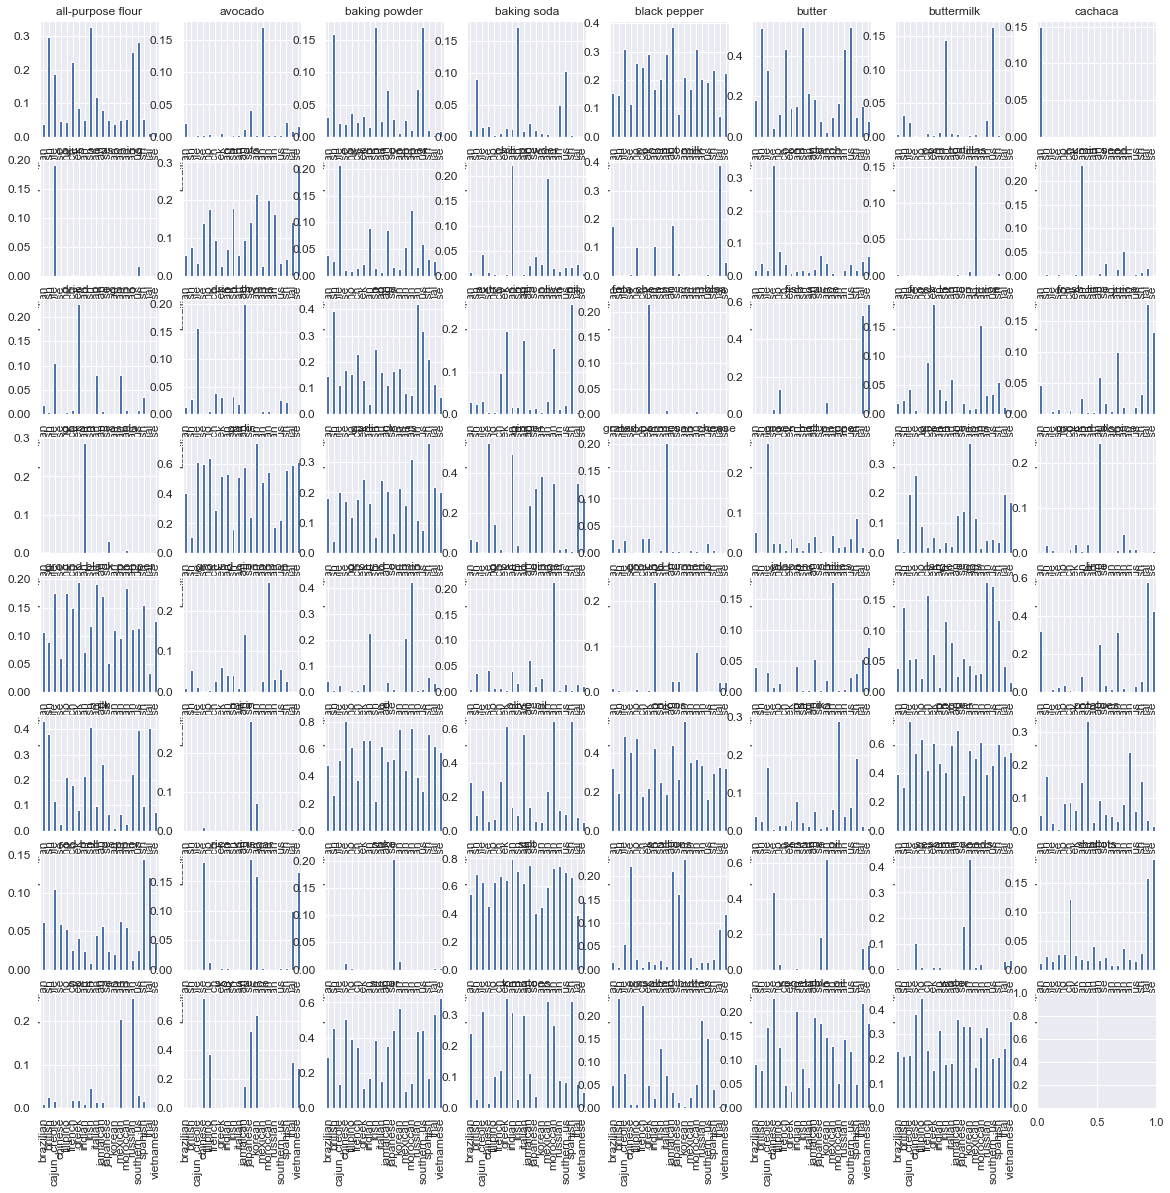

In [17]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for ingredient, ax_index in zip(unique, range(64)):
    indices = train['all_ingredients'].str.contains(ingredient)
    relative_freq = (train[indices]['cuisine'].value_counts() / train['cuisine'].value_counts())
    relative_freq.plot(
        kind='bar',
        ax=axes.ravel()[ax_index], fontsize=12,title=ingredient);

In [18]:
# from this diagram: 
# unique ingredients that have a high degree of uniqueness: 
# soy sauce - china, japan and korea 
# fish sauce- thailand and vietnam 
# garam masala- indian 
# ground ginger- morrocan 
#avocado- mexican 

# here are some of the common spices: 
#salt 
#oil 
#pepper 
#sugar
#large eggs
#onions 

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 

In [20]:
cv=CountVectorizer()
x=cv.fit_transform(train['all_ingredients'].values)

In [21]:
x.shape

(39774, 3051)

In [22]:
print(list(cv.vocabulary_.keys())[:100])

['romaine', 'lettuce', 'black', 'olives', 'grape', 'tomatoes', 'garlic', 'pepper', 'purple', 'onion', 'seasoning', 'garbanzo', 'beans', 'feta', 'cheese', 'crumbles', 'plain', 'flour', 'ground', 'salt', 'thyme', 'eggs', 'green', 'yellow', 'corn', 'meal', 'milk', 'vegetable', 'oil', 'mayonaise', 'cooking', 'chilies', 'grilled', 'chicken', 'breasts', 'powder', 'soy', 'sauce', 'butter', 'livers', 'water', 'wheat', 'shallots', 'cornflour', 'cayenne', 'onions', 'paste', 'lemon', 'juice', 'chili', 'passata', 'cumin', 'boneless', 'skinless', 'thigh', 'garam', 'masala', 'double', 'cream', 'natural', 'yogurt', 'bay', 'leaf', 'sugar', 'fresh', 'ginger', 'root', 'cinnamon', 'vanilla', 'extract', 'powdered', 'baking', 'olive', 'medium', 'shrimp', 'chopped', 'cilantro', 'jalapeno', 'flat', 'parsley', 'skirt', 'steak', 'white', 'vinegar', 'sea', 'chorizo', 'sausage', 'pistachio', 'nuts', 'almond', 'bark', 'dried', 'cranberries', 'pineapple', 'pork', 'poblano', 'peppers', 'tortillas', 'cheddar', 'iceb

In [23]:
enc=LabelEncoder()
y=enc.fit_transform(train.cuisine)

In [25]:
y[:100]

array([ 6, 16,  4,  7,  7, 10, 17,  9, 13,  9,  9,  3,  9, 13,  9,  7,  1,
        9, 18, 19, 18, 13, 16,  3,  9,  3,  2,  9,  3, 13,  9,  2, 13, 18,
        9,  2,  9,  4, 16, 16,  9,  0, 13,  7, 13,  3,  5, 16, 16, 16, 11,
       16,  9, 16,  9, 10, 11,  7,  9,  8, 18, 18,  7, 10,  9, 18, 12,  5,
        5, 16, 17,  7, 14,  9,  9, 14, 14, 19, 11, 13,  2, 16,  5,  7,  7,
        9,  9,  7, 12, 17,  9, 16, 16,  6, 13, 13, 16,  7,  9,  9])

In [26]:
enc.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)

C:\Users\Valery\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
logistic.score(x_test, y_test)

0.7810182275298554

In [31]:
# it has a 78.1% accuracy, to proof that is it the correct cuisine.to be more in-depth, crafting a confusion matrix to see a clearer picture


Text(0.5, 73.63499999999996, 'Predicted label')

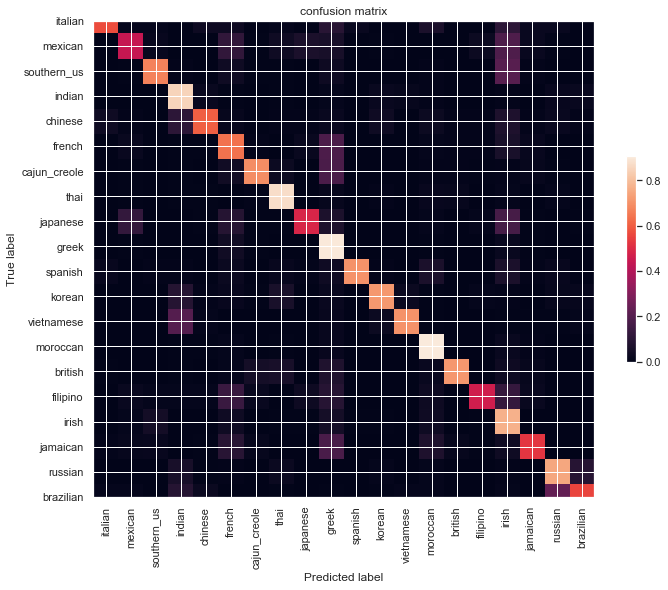

In [32]:
from sklearn.metrics import confusion_matrix 

plt.figure(figsize=(10,10))

cm=confusion_matrix(y_test, logistic.predict(x_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalized, interpolation='nearest')
plt.title("confusion matrix")
plt.colorbar(shrink=0.3)
cuisines = train['cuisine'].value_counts().index
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [33]:
y_pred=logistic.predict(x_test)
print(classification_report(y_test,y_pred,target_names=cuisines))

              precision    recall  f1-score   support

     italian       0.73      0.57      0.64        93
     mexican       0.52      0.44      0.48       166
 southern_us       0.78      0.67      0.72       313
      indian       0.76      0.85      0.80       484
     chinese       0.68      0.61      0.64       137
      french       0.61      0.64      0.63       543
cajun_creole       0.79      0.69      0.74       241
        thai       0.88      0.87      0.88       616
    japanese       0.65      0.49      0.56       144
       greek       0.80      0.90      0.85      1549
     spanish       0.84      0.70      0.77       108
      korean       0.83      0.72      0.77       273
  vietnamese       0.84      0.70      0.77       165
    moroccan       0.91      0.91      0.91      1343
     british       0.83      0.72      0.77       172
    filipino       0.61      0.47      0.53        86
       irish       0.70      0.77      0.73       872
    jamaican       0.64    

In [34]:
# f1 score is also known as balanced precision and recall 
# it also can be used to interpreted as a weighted average of the precison and recall, where an F1 dcore reaches its best value at 1, and the worst score at 0. 
# formula of F1=  2 * (precision * recall) / (precision + recall)

# precision- positice predictive value is the fraction of relevant instances among the retrieved instances 
#recall- also known as sensitivity is the fraction of the total amount of relevant instances that were actually retrieved. 

#in conclusion,mexican and french scores are the lowest as there alot of ingreidents that are widely used within the different cuisine. 


In [35]:
#i notice there alot of different cuisine uses salt to make food

# calcuating ingredient co-occurrences 
#who is salt best friend? it is pepper? 


In [36]:
import itertools
# Example of what the itertools.combinations function does.
ingredient=train['ingredients']
list(itertools.combinations(ingredient[0][:5], 2))

[('romaine lettuce', 'black olives'),
 ('romaine lettuce', 'grape tomatoes'),
 ('romaine lettuce', 'garlic'),
 ('romaine lettuce', 'pepper'),
 ('black olives', 'grape tomatoes'),
 ('black olives', 'garlic'),
 ('black olives', 'pepper'),
 ('grape tomatoes', 'garlic'),
 ('grape tomatoes', 'pepper'),
 ('garlic', 'pepper')]

In [37]:
#Calculating ingredient counts and co-occurrences in recipes.
from collections import Counter
cooc_counts = Counter()
ing_count  = Counter()
for k in ingredient:
    for ing in k:
        ing_count[ing] += 1
    for (ing_a, ing_b) in itertools.combinations(set(k), 2):
        # NOTE: just making sure we added pairs in a consistent order (a < b); you can also add both (a,b) and (b,a) if you want.
        if ing_a > ing_b:
            ing_a, ing_b = ing_b, ing_a
        cooc_counts[(ing_a, ing_b)] += 1
        

In [38]:
cooc_df = pd.DataFrame(((ing_a, ing_b, ing_count[ing_a], ing_count[ing_b], cooc) 
                        for (ing_a, ing_b), 
                        cooc in cooc_counts.items()), 
                       columns=['a', 'b', 'a_count', 'b_count', 'cooc'])
cooc_df.sample(10)


,a,b,a_count,b_count,cooc
266642,cayenne pepper,pitted kalamata olives,1523,204,1
211019,Kraft Miracle Whip Dressing,cajun seasoning,5,376,1
360934,green peas,iceberg lettuce,212,164,1
470610,seeds,sweetened condensed milk,130,271,1
174785,sausage casings,yellow onion,108,1184,3
292197,eggs,unsweetened chocolate,3388,36,5
37670,chees fresco queso,lime,34,1439,5
259021,hominy,spices,77,171,1
253426,chili flakes,star anise,158,259,4
105252,chocolate mousse,icing,2,7,1


In [39]:
cooc_df[cooc_df.a == 'salt'].sort_values('cooc', ascending=False).head(10)

,a,b,a_count,b_count,cooc
159,salt,water,18049,7457,3960
381,salt,sugar,18049,6434,3061
75,salt,vegetable oil,18049,4385,2101
62,salt,tomatoes,18049,3058,1682
2632,salt,unsalted butter,18049,2782,1445
120,salt,soy sauce,18049,3296,1065
3561,salt,scallions,18049,1891,682
404,salt,vanilla extract,18049,1298,663
3745,salt,tomato paste,18049,1158,640
308,salt,shallots,18049,1477,636


In [40]:
# Pointwise Mutual Information  
# PMI(A,B)=log(P(A,B)/P(A)*P(B))
# purpose of PMI is to remove rare ingredients,like KRAFT Mexican Style 2% Milk Finely Shredded Foo..


In [41]:
p_a = cooc_df.a_count / sum(ing_count.values())
p_b = cooc_df.b_count / len(ing_count.values())
p_a_b = cooc_df.cooc / cooc_df.cooc.sum()
cooc_df['pmi'] = np.log(p_a_b / (p_a * p_b))

In [42]:
cooc_df.sort_values('pmi', ascending=False).head(10)
# rare ingridents 

,a,b,a_count,b_count,cooc,pmi
200552,dumpling dough,red vinegar,1,1,1,7.05513
266399,garbanzo bean flour,psyllium husks,1,1,1,7.05513
124368,Hawaiian salt,sliced mango,1,1,1,7.05513
439447,french style sandwich rolls,liverwurst,1,1,1,7.05513
449965,frozen seafood,gluten-free oyster sauce,1,1,1,7.05513
181820,light cream or half and half,lipton green tea bag,1,1,1,7.05513
80598,pork roll,roast pork seasoning mix,1,1,1,7.05513
302363,adobo style seasoning,breakfast sausage links,1,1,1,7.05513
266518,buckwheat honey,teff,1,1,1,7.05513
126847,Betty Crockerâ„¢ oatmeal cookie mix,YoplaitÂ® Greek 100 blackberry pie yogurt,1,1,1,7.05513


In [43]:
min_count=5 
cooc_df[(cooc_df.a_count>=min_count)& (cooc_df.b_count>=min_count)].sort_values('pmi',ascending=False).head(20)
# not commonly use ingridents  

,a,b,a_count,b_count,cooc,pmi
172114,Herdez Salsa Casera,Herdez Salsa Verde,5,6,3,4.752545
208014,black treacle,porridge oats,7,5,3,4.598394
400949,kewra water,stone flower,6,6,3,4.570224
134563,sazon seasoning,sofrito,5,5,2,4.529402
278705,Chinese sesame paste,black rice vinegar,5,9,3,4.347080
215340,bertolli vineyard premium collect marinara wit...,"clams, well scrub",5,6,2,4.347080
353789,rye whiskey,twists,6,5,2,4.347080
116922,Johnsonville Andouille,Red GoldÂ® diced tomatoes,6,5,2,4.347080
100510,Chinese rose wine,maltose,5,9,3,4.347080
184959,mo hanh,vegan mayonnaise,5,6,2,4.347080


In [44]:
min_count = 30
cooc_df[(cooc_df.a_count >= min_count) & (cooc_df.b_count >= min_count)].sort_values('pmi', ascending=True).head(20)
# common ingredients 

,a,b,a_count,b_count,cooc,pmi
417826,onions,vanilla extract,7972,1298,1,-9.097140
275633,garlic cloves,vanilla extract,6237,1298,1,-8.851704
410878,green onions,vanilla extract,3078,1298,1,-8.145485
353597,grated parmesan cheese,sesame oil,1886,1773,1,-7.967512
215359,fresh lime juice,milk,1368,2263,1,-7.890422
424125,dried oregano,sesame oil,1707,1773,1,-7.867791
272201,dried oregano,ginger,1707,1755,1,-7.857587
410881,pepper,vanilla extract,4438,1298,2,-7.818262
271934,fresh ginger,grated parmesan cheese,1503,1886,1,-7.802302
360765,onions,sweet onion,7972,336,1,-7.745672


In [45]:
# ingrident match list - if u have 1 ingriedient what can u cook together with it 
# using matrix factorization 
#it help to generalizes data of the ingredients, 
#and remov noise and redundancies of the data. 


In [46]:
from scipy.sparse import csr_matrix
data_df = cooc_df[cooc_df.pmi > 0].copy()
# Since the matrix is symetric, we add the same values for (b,a) as we have for (a,b)
data_df_t = data_df.copy()
data_df.a, data_df.b = data_df.b, data_df.a
data_df = pd.concat([data_df, data_df_t])

rows_idx, row_keys = pd.factorize(data_df.a)
cols_idx, col_keys = pd.factorize(data_df.b)
values = data_df.pmi

matrix = csr_matrix((values, (rows_idx, cols_idx)))
key_to_row = {key: idx for idx, key in enumerate(row_keys)}

In [47]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(200)
factors = svd.fit_transform(matrix)

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
def most_similar(ingredient, topn=10):
    if ingredient not in key_to_row:
        print("Unknown ingredient.")
    factor = factors[key_to_row[ingredient]]
    cosines = cosine_similarity([factor], factors)[0]
    indices = cosines.argsort()[::-1][:topn + 1]
    keys = [row_keys[idx] for idx in indices if idx != key_to_row[ingredient]]
    return keys, cosines[indices]

def display_most_similar(ingredient, topn=10):
    print("- Most similar to '{}'".format(ingredient))
    for similar_ing, score in zip(*most_similar(ingredient, topn)):
        print("  . {} : {:.2f}".format(similar_ing, score)) 

In [72]:
display_most_similar('beef')

- Most similar to 'beef'
  . beef broth : 1.00
  . bell pepper : 0.85
  . bread crumbs : 0.83
  . ground beef : 0.83
  . cabbage : 0.83
  . veggie patties : 0.83
  . Italian seasoned breadcrumbs : 0.83
  . shortening : 0.83
  . margarine : 0.83
  . broccoli : 0.82


In [75]:
display_most_similar('buffalo mozarella')

- Most similar to 'buffalo mozarella'
  . hot pepperoni : 1.00
  . Stonefire Italian Thin Pizza Crust : 1.00
  . pepperoni turkei : 0.99
  . pizza sauce : 0.79
  . hot italian pork sausage : 0.79
  . Johnsonville Mild Italian Sausage Links : 0.79
  . jumbo shells : 0.79
  . mini pepperoni slices : 0.78
  . baby eggplants : 0.78
  . pizza doughs : 0.78


In [86]:
display_most_similar('rice noodles')

- Most similar to 'rice noodles'
  . organic low sodium chicken broth : 1.00
  . laksa paste : 0.99
  . dried arbol chile : 0.76
  . low sodium parmesan cheese : 0.55
  . asian dressing : 0.55
  . meatballs : 0.55
  . rice paper : 0.55
  . sweet soy : 0.52
  . baby tatsoi : 0.51
  . chicken : 0.51


In [87]:
display_most_similar('romaine lettuce')

- Most similar to 'romaine lettuce'
  . pita wraps : 1.00
  . low-fat salad dressing : 0.99
  . baby beets : 0.88
  . extra fine granulated sugar : 0.78
  . frozen lemonade concentrate, thawed and undiluted : 0.72
  . Soy VayÂ® Toasted Sesame Dressing & Marinade : 0.55
  . whole wheat pita bread rounds : 0.49
  . red mustard : 0.49
  . t-bone steak : 0.46
  . pecorino romano cheese : 0.39
